# Calculating recurrence scores in time series

In [2]:
using CABLAB
using ImageMagick #for inline Map plots

We define the path to the datacube, choose some variables and read a geographical region into memory.

In [3]:
c             = Cube("/Net/Groups/BGI/scratch/fgans/cubecopy/datacube/")
vars          = ["Emission","SoilMoisture","t2m"];
cdata         = getCubeData(c,latitude=(35,65), longitude=(-10,35),variable=vars);

Here starts the actual processing step. Note that each function call has the result of the previous call as its argument. The following processing steps are applied:

- gap Filling with the mean seasonal cycle
- calculating anomalies, i.e. subtract the mean seasonal cycle
- normalize the different variables to unit variance
- caculate recurrence scores to detect outliers

All these processing steps are implemented in the DAT.

In [4]:
@time cube_filled     = mapCube(gapFillMSC,cdata);

 18.274325 seconds (16.69 M allocations: 1021.405 MB, 1.48% gc time)


In [6]:
@time cube_anomalies  = mapCube(removeMSC,cube_filled);

  5.326234 seconds (5.27 M allocations: 259.086 MB, 4.70% gc time)


In [7]:
@time cube_normalized = mapCube(normalize,cube_anomalies);

  5.081312 seconds (4.95 M allocations: 243.819 MB, 1.94% gc time)


In [8]:
@time scores          = mapCube(recurrences,cube_normalized,5.0,5);

 34.989931 seconds (37.15 M allocations: 1.535 GB, 1.25% gc time)


Here follow some interactive time series plots of the different variables, anomalies, and the resulting scores. 3 Extreme events would be detected here. 

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

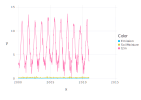

In [13]:
plotTS(cube_filled)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

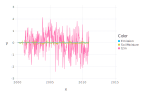

In [14]:
plotTS(cube_anomalies)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

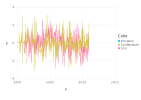

In [15]:
plotTS(cube_normalized)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

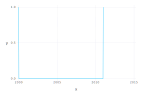

In [16]:
plotTS(scores)